# scikit-image examples

In [1]:
import skimage

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data

In /home/esrf/casagran/miniconda3/envs/pymicro-esrf-slurm-intel/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/esrf/casagran/miniconda3/envs/pymicro-esrf-slurm-intel/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/esrf/casagran/miniconda3/envs/pymicro-esrf-slurm-intel/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/esrf/casagran/miniconda3/envs/pymicro-esrf-slurm-intel/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_n

In [3]:
coins = data.coins()

(-0.5, 383.5, 302.5, -0.5)

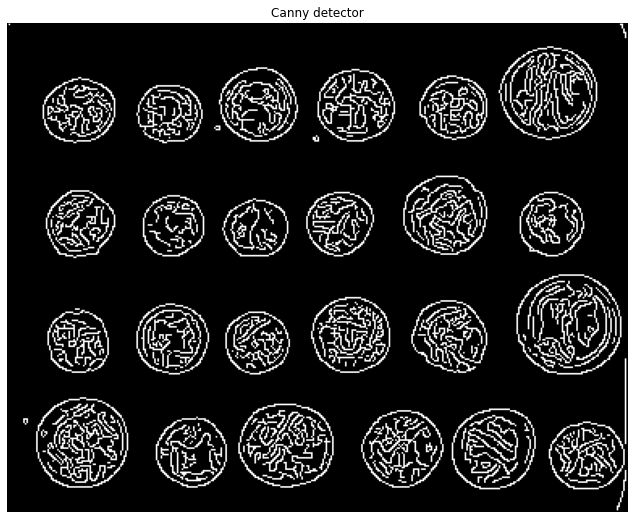

In [4]:
from skimage.feature import canny

edges = canny(coins)

fig, ax = plt.subplots(figsize=(12, 9))
ax.imshow(edges, cmap=plt.cm.gray)
ax.set_title('Canny detector')
ax.axis('off')

In [5]:
edges

array([[False, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

(-0.5, 383.5, 302.5, -0.5)

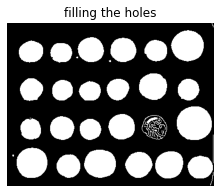

In [6]:
from scipy import ndimage as ndi

fill_coins = ndi.binary_fill_holes(edges)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(fill_coins, cmap=plt.cm.gray)
ax.set_title('filling the holes')
ax.axis('off')

(-0.5, 383.5, 302.5, -0.5)

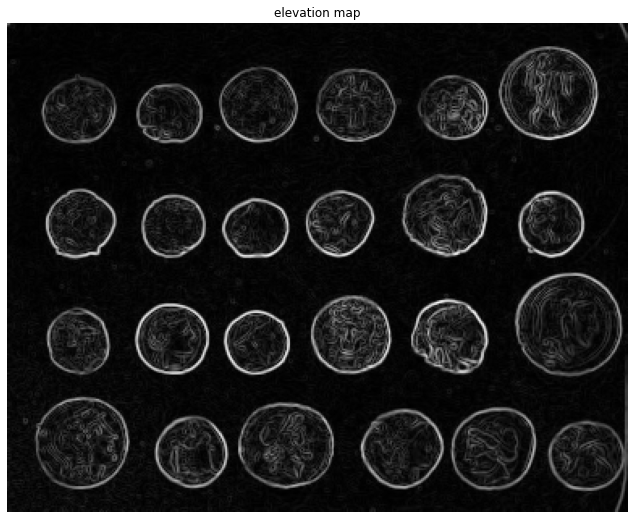

In [7]:
from skimage.filters import sobel

elevation_map = sobel(coins)

fig, ax = plt.subplots(figsize=(12, 9))
ax.imshow(elevation_map, cmap=plt.cm.gray)
ax.set_title('elevation map')
ax.axis('off')

In [8]:
elevation_map

array([[0.22261811, 0.22580966, 0.04256528, ..., 0.01675295, 0.00765711,
        0.0202113 ],
       [0.22752914, 0.17208326, 0.04307036, ..., 0.03683979, 0.00765711,
        0.01180548],
       [0.10007686, 0.06139791, 0.02499519, ..., 0.084638  , 0.00490196,
        0.02018751],
       ...,
       [0.01386484, 0.03114192, 0.02949335, ..., 0.01669548, 0.00588235,
        0.00876889],
       [0.02752092, 0.04030354, 0.0335059 , ..., 0.00571662, 0.00980392,
        0.00438445],
       [0.02941176, 0.05787636, 0.0417099 , ..., 0.00490196, 0.00876889,
        0.00554594]])

In [9]:
from skimage import data, segmentation
from skimage.future import graph
img = data.astronaut()
labels = segmentation.slic(img)
rag = graph.rag_mean_color(img, labels)
new_labels = graph.cut_threshold(labels, rag, 10)

/tmp/ipykernel_1376656/4210993364.py:4: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  labels = segmentation.slic(img)


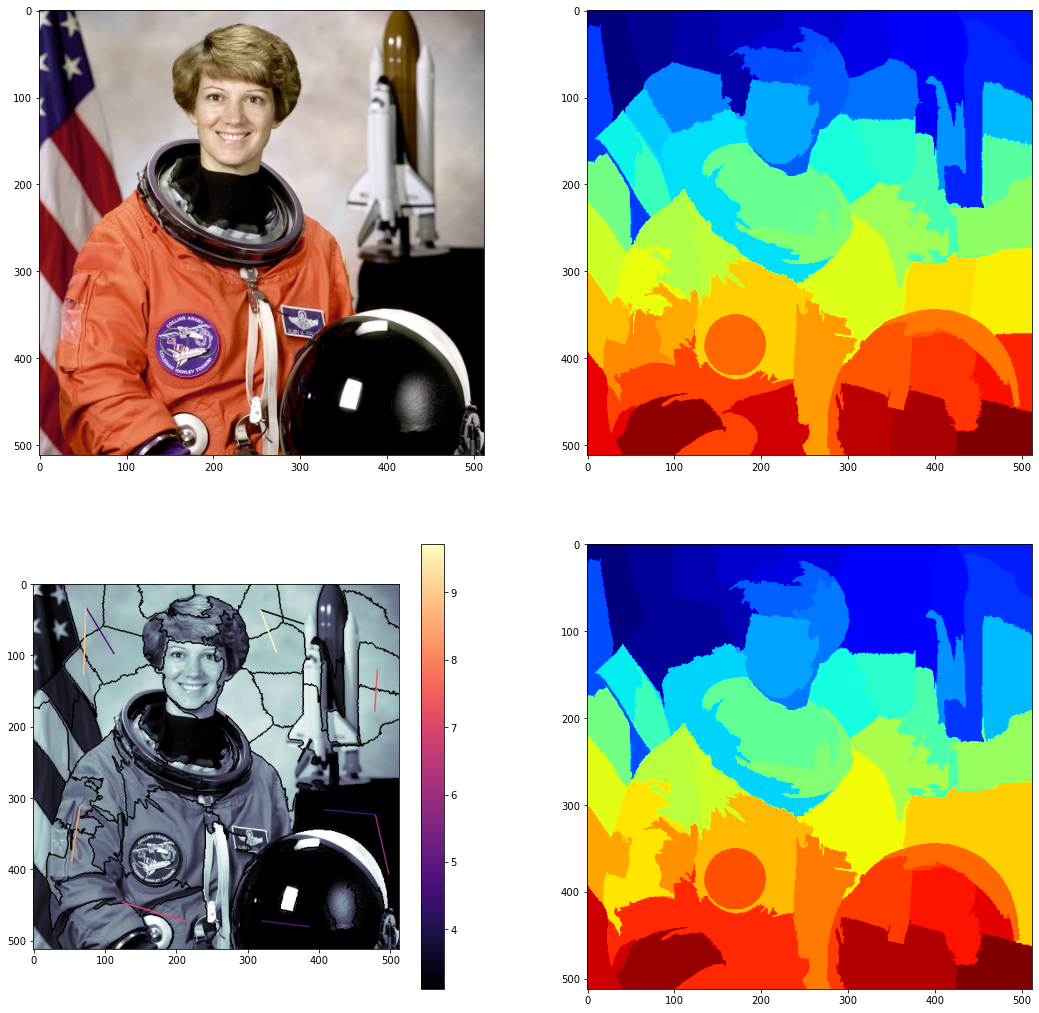

In [10]:
fig, axs = plt.subplots(nrows := 2, ncols := 2, figsize=(ncols * 9, nrows * 9))
ax = axs[0, 0]
ax.imshow(img, cmap=plt.cm.gray)
ax = axs[0, 1]
ax.imshow(labels, cmap=plt.cm.jet)
ax = axs[1, 0]
lc = graph.show_rag(labels, rag, img, ax=ax)
cbar = plt.colorbar(lc, ax=ax)
ax = axs[1, 1]
ax.imshow(new_labels, cmap=plt.cm.jet)

In [11]:
rag.edges

EdgeView([(1, 14), (1, 18), (5, 6), (5, 13), (17, 25), (35, 42), (36, 37), (36, 48), (46, 51), (52, 53)])

In [12]:
rag.get_edge_data(1, 14)

{'weight': 4.820742220626244}

In [13]:
%who

ax	 axs	 canny	 cbar	 coins	 data	 edges	 elevation_map	 fig	 
fill_coins	 graph	 img	 labels	 lc	 ncols	 ndi	 new_labels	 np	 
nrows	 plt	 rag	 segmentation	 skimage	 sobel	 


In [14]:
del ax, axs, canny, cbar, coins, data, edges, elevation_map, fig, fill_coins, graph, img, labels, lc, ncols, ndi, new_labels, np, nrows, plt, rag, segmentation, skimage, sobel

In [15]:
%who

Interactive namespace is empty.


# henry's example

In [16]:
from pathlib import Path
filename = "Ti_ebsd_demo.h5"
filepath = Path(filename).absolute()
assert filepath.exists()

In [17]:
from pymicro.crystal.ebsd import OimScan
scan = OimScan.from_file(str(filepath))

Ti_ebsd_demo .h5
reading EBSD scan Pattern cropped cleaned-Dil from file /home/esrf/casagran/pymicro/dev/joao-ebsd-segment-grains/Ti_ebsd_demo.h5


In [18]:
%%time
grain_ids = scan.segment_grains()

grain segmentation for EBSD scan, misorientation tolerance=5.0, minimum confidence index=0.2


/home/esrf/casagran/pymicro/pymicro/crystal/microstructure.py:335: RuntimeWarning: invalid value encountered in true_divide
  n /= np.sqrt((delta[1, 2] - delta[2, 1]) ** 2 +
/home/esrf/casagran/pymicro/pymicro/crystal/microstructure.py:373: RuntimeWarning: invalid value encountered in arccos
  omega = np.arccos(cw)


segmentation progress: 100.00 %
82 grains were segmented
CPU times: user 23.6 s, sys: 17.7 ms, total: 23.6 s
Wall time: 23.5 s


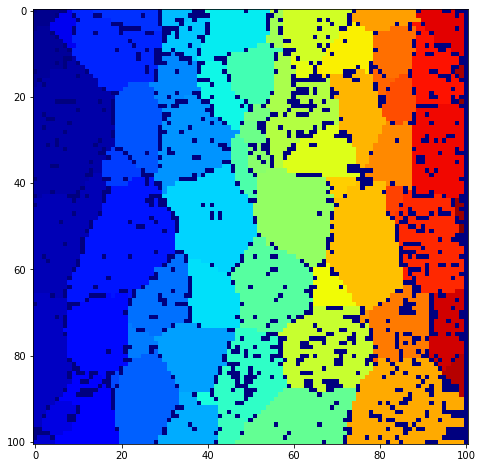

In [19]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.imshow(grain_ids, cmap='jet')

In [20]:
import numpy as np
from pymicro.crystal.microstructure import Orientation
o1 = Orientation.from_euler(np.degrees(scan.euler[76, 12]))
o2 = Orientation.from_euler(np.degrees(scan.euler[76, 13]))

In [21]:
o1

Crystal Orientation 
-------------------
orientation matrix = 
 [[-0.02251477  0.94939106 -0.31328852]
 [-0.81713031  0.16307454  0.55290573]
 [ 0.57601314  0.26844609  0.77210463]]
Euler angles (degrees) = ( 114.987,  39.457, 330.463)
Rodrigues vector = [0.14872428 0.46495436 0.92359191]
Quaternion = [ 0.69149555 -0.10284218  0.32151387  0.6386597 ]

In [22]:
o2

Crystal Orientation 
-------------------
orientation matrix = 
 [[-0.02423061  0.94861369 -0.31550744]
 [-0.81441588  0.16430021  0.55653591]
 [ 0.57977552  0.27043948  0.76858496]]
Euler angles (degrees) = ( 115.007,  39.773, 330.451)
Rodrigues vector = [0.14989429 0.46906495 0.92370281]
Quaternion = [ 0.69077032 -0.10354253  0.32401615  0.63806649]

In [23]:
from pymicro.crystal.lattice import Symmetry
sym = Symmetry.hexagonal
disor = o1.disorientation(o2, crystal_structure=sym)

In [24]:
disor

(0.005524397925493897,
 array([0.84994089, 0.52682422, 0.00753181]),
 array([-0.44528184,  0.89485979,  0.03082275]))

In [25]:
angle = disor[0]
np.degrees(angle)

0.3165246854816277

In [26]:
%who

OimScan	 Orientation	 Path	 Symmetry	 angle	 ax	 disor	 fig	 filename	 
filepath	 grain_ids	 np	 o1	 o2	 plt	 scan	 sym	 


In [27]:
scan_pymicro = scan
grain_ids_pymicro = grain_ids

In [28]:
del OimScan, Orientation, Path, Symmetry, angle, ax, disor, fig, filename, filepath, grain_ids, np, o1, o2, plt, scan, sym 

In [29]:
%who

grain_ids_pymicro	 scan_pymicro	 


# build a distance graph

In [30]:
from pathlib import Path
filename = "Ti_ebsd_demo.h5"
filepath = Path(filename).absolute()
assert filepath.exists()

from pymicro.crystal.ebsd import OimScan
scan = OimScan.from_file(str(filepath))

Ti_ebsd_demo .h5
reading EBSD scan Pattern cropped cleaned-Dil from file /home/esrf/casagran/pymicro/dev/joao-ebsd-segment-grains/Ti_ebsd_demo.h5


In [31]:
shape = scan.iq.shape
shape

(101, 101)

In [32]:
size = shape[0] * shape[1]

In [33]:
import numpy as np
# each pixel has its own label
labels = np.arange(size).reshape(shape)

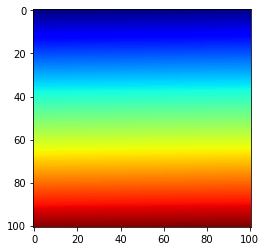

In [36]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.imshow(labels, cmap='jet')

In [42]:
%%time
from skimage.future.graph import RAG
rag = RAG(label_image=labels, connectivity=1) 

for node in rag.nodes:
    rag.nodes[node]['labels'] = [node]

CPU times: user 292 ms, sys: 64.6 ms, total: 357 ms
Wall time: 286 ms


In [43]:
%%time
import itertools
from scipy.spatial.distance import cdist

pixel_indices = np.array(list(itertools.product(range(shape[0]), range(shape[1]))))
pixel_position_distances = cdist(pixel_indices, pixel_indices, metric='cityblock')
pixels_to_get = np.stack(np.where(pixel_position_distances == 1)).T
pixels_to_get = pixels_to_get[pixels_to_get[:, 0] < pixels_to_get[:, 1]]  # get rid of duplicates

CPU times: user 481 ms, sys: 201 ms, total: 683 ms
Wall time: 680 ms


In [57]:
pixels_to_get.shape

(20200, 2)

In [59]:
101 * 100 * 2

20200

In [44]:
%%time
import progressbar
from pymicro.crystal.microstructure import Orientation
from pymicro.crystal.lattice import Symmetry

for pix1_idx, pix2_idx in progressbar.progressbar(pixels_to_get):
    pixel1_pos = tuple(pixel_indices[pix1_idx])
    pixel2_pos = tuple(pixel_indices[pix2_idx])
    euler1 = scan.euler[pixel1_pos]
    euler2 = scan.euler[pixel2_pos]
    o1 = Orientation.from_euler(np.degrees(euler1))
    o2 = Orientation.from_euler(np.degrees(euler2))
    disor = o1.disorientation(o2, crystal_structure=Symmetry.hexagonal)
    angle = disor[0]
    lab1 = labels[pixel1_pos]
    lab2 = labels[pixel2_pos]
    rag.add_edge(lab1, lab2, dict(weight=angle))

100% (20200 of 20200) |##################| Elapsed Time: 0:00:52 Time:  0:00:52


CPU times: user 52.5 s, sys: 693 ms, total: 53.2 s
Wall time: 52.4 s


**obs**: angles (weights) are in radians

In [45]:
threshold_deg = 5 
threshold_rad = np.radians(threshold_deg)
threshold_rad

0.08726646259971647

In [46]:
from skimage.future.graph import cut_threshold
new_labels = cut_threshold(labels, rag, threshold_rad)

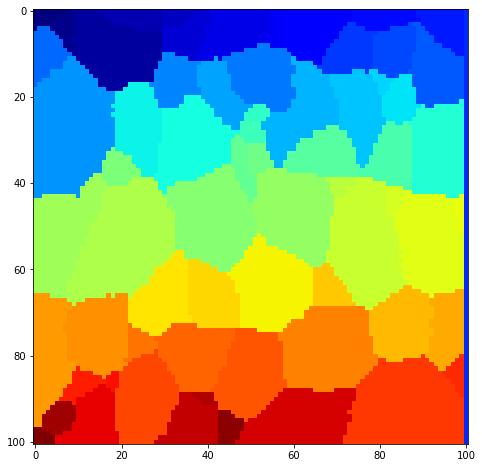

In [47]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.imshow(new_labels, cmap='jet')

In [48]:
%who

OimScan	 Orientation	 Path	 RAG	 Symmetry	 angle	 ax	 cdist	 cut_threshold	 
disor	 euler1	 euler2	 fig	 filename	 filepath	 grain_ids_pymicro	 itertools	 lab1	 
lab2	 labels	 new_labels	 node	 np	 o1	 o2	 pix1_idx	 pix2_idx	 
pixel1_pos	 pixel2_pos	 pixel_indices	 pixel_position_distances	 pixels_to_get	 plt	 progressbar	 rag	 scan	 
scan_pymicro	 shape	 size	 threshold_deg	 threshold_rad	 


In [49]:
scan_skimage = scan
labels_skimage = new_labels

# compare

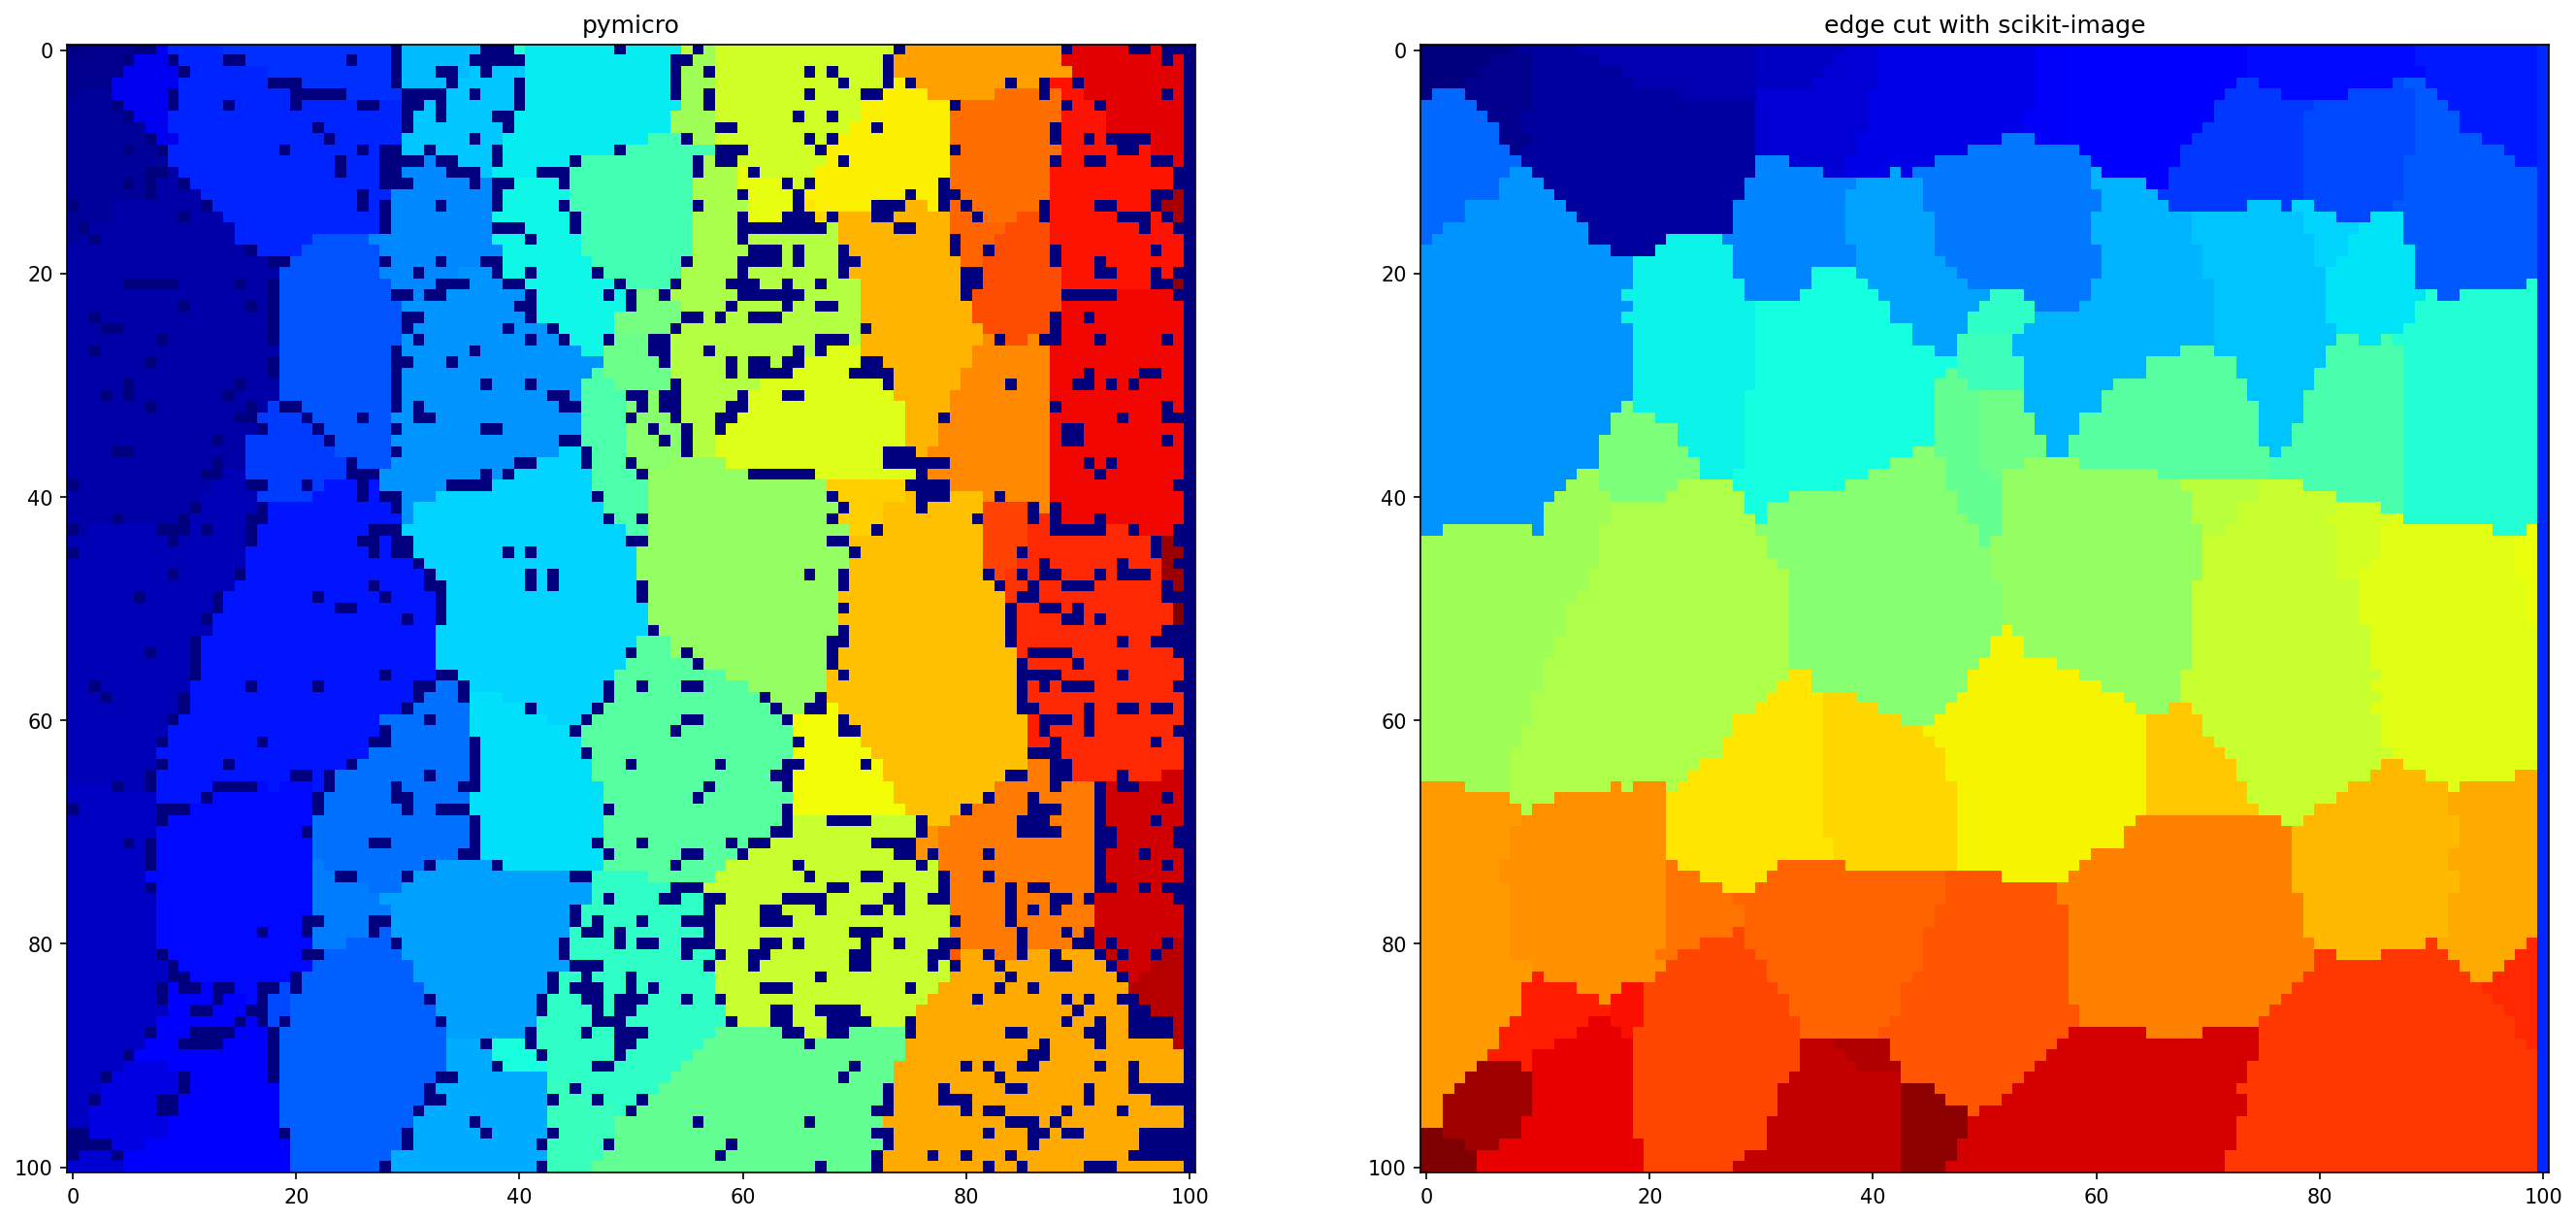

In [56]:
fig, axs = plt.subplots(nrows := 1, ncols := 2, figsize=(ncols * (sz:=11), nrows * sz), dpi=150)

ax = axs[0]
ax.imshow(grain_ids_pymicro, cmap=plt.cm.jet)
ax.set_title("pymicro")

ax = axs[1]
ax.imshow(labels_skimage, cmap=plt.cm.jet)
ax.set_title("edge cut with scikit-image")

fig.savefig("pymicro-vs-scikitimage.png")

# trace

## data

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
from pathlib import Path
from pymicro.crystal.ebsd import OimScan

filename = "Ti_ebsd_demo.h5"
filepath = Path(filename).absolute()
assert filepath.exists()

scan = OimScan.from_file(str(filepath))

del filename, filepath

In /home/esrf/casagran/miniconda3/envs/pymicro-esrf-slurm-intel/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/esrf/casagran/miniconda3/envs/pymicro-esrf-slurm-intel/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/esrf/casagran/miniconda3/envs/pymicro-esrf-slurm-intel/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/esrf/casagran/miniconda3/envs/pymicro-esrf-slurm-intel/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_n

Ti_ebsd_demo .h5
reading EBSD scan Pattern cropped cleaned-Dil from file /home/esrf/casagran/pymicro/dev/joao-ebsd-segment-grains/Ti_ebsd_demo.h5


## functions

In [5]:
def pymicro_method(scan_):
    return scan_.segment_grains_traced()

In [6]:
%autoreload 2
import numpy as np
from skimage.future.graph import RAG
import itertools
from scipy.spatial.distance import cdist
import progressbar
from pymicro.crystal.microstructure import Orientation
from pymicro.crystal.lattice import Symmetry
from skimage.future.graph import cut_threshold

def skimage_method(scan_):
    shape = scan_.iq.shape
    size = shape[0] * shape[1]
    # each pixel has its own label
    labels = np.arange(size).reshape(shape)
    rag = RAG(label_image=labels, connectivity=1) 
    for node in rag.nodes:
        rag.nodes[node]['labels'] = [node]
    pixel_indices = np.array(list(itertools.product(range(shape[0]), range(shape[1]))))
    pixel_position_distances = cdist(pixel_indices, pixel_indices, metric='cityblock')
    pixels_to_get = np.stack(np.where(pixel_position_distances == 1)).T
    pixels_to_get = pixels_to_get[pixels_to_get[:, 0] < pixels_to_get[:, 1]]  # get rid of duplicates
    for pix1_idx, pix2_idx in progressbar.progressbar(pixels_to_get):
        pixel1_pos = tuple(pixel_indices[pix1_idx])
        pixel2_pos = tuple(pixel_indices[pix2_idx])
        euler1 = scan_.euler[pixel1_pos]
        euler2 = scan_.euler[pixel2_pos]
        o1 = Orientation.from_euler(np.degrees(euler1))
        o2 = Orientation.from_euler(np.degrees(euler2))
        disor = o1.disorientation(o2, crystal_structure=Symmetry.hexagonal)  # angles (weights) are in radians
        angle = disor[0]
        lab1 = labels[pixel1_pos]
        lab2 = labels[pixel2_pos]
        rag.add_edge(lab1, lab2, dict(weight=angle))
    threshold_deg = 5 
    threshold_rad = np.radians(threshold_deg)
    return cut_threshold(labels, rag, threshold_rad)    

## tracing stuff

In [7]:
from json import JSONEncoder
class CustomJsonEncoder(JSONEncoder):
    def default(self, o):
        if isinstance(o, Path):
            return str(o)
        return super().default(o)

In [8]:
from datetime import datetime
from pathlib import Path
from dataclasses import dataclass, field
from typing import ClassVar

@dataclass
class Outputs:

    dir: ClassVar[Path] = Path("./profiles").absolute()

    method: str
    when: datetime = field(default_factory=datetime.now)

    @property
    def run(self) -> str:
        return f"{self.method}.{self.when.isoformat(timespec='seconds')}"

    @property
    def json_report(self):
        return self.dir / (self.run + ".json")

    @property
    def html_report(self):
        return self.dir / (self.run + ".html")

    
Outputs.dir.mkdir(exist_ok=True)

In [9]:
%%writefile .gitignore
profiles/

Overwriting .gitignore


## pymicro

In [27]:
%%time
from viztracer import VizTracer
vt = VizTracer(
    max_stack_depth=3,
) 
vt.start()
pymicro_labels = pymicro_method(scan)
vt.stop()

grain segmentation for EBSD scan, misorientation tolerance=5.0, minimum confidence index=0.2
segmentation progress: 100.00 %
82 grains were segmented
CPU times: user 26.6 s, sys: 84.6 ms, total: 26.7 s
Wall time: 26.6 s


In [28]:
%%time
import json
try:
    # this breaks when there is too much stuff...
    vt.parse()
except:
    print('bad!')
else:
    outputs = Outputs("pymicro")
    with outputs.json_report.open("w") as fp:
        json.dump(vt.data, fp, indent=4, cls=CustomJsonEncoder)
    vt.save(str(outputs.html_report))
outputs.run

Loading finish                                        
Dumping trace data, total entries: 72164
Use the following command to open the report:
vizviewer /home/esrf/casagran/pymicro/dev/joao-ebsd-segment-grains/profiles/pymicro.2021-09-02T16:07:55.html
CPU times: user 831 ms, sys: 104 ms, total: 936 ms
Wall time: 987 ms


'pymicro.2021-09-02T16:07:55'

the trace (visually) shows that the time is dominated by `disorientation` and `from_euler`

In [32]:
from_euler_calls = [call for call in vt.data["traceEvents"] if call["name"].startswith("from_euler")]

In [34]:
len(from_euler_calls)

18314

In [47]:
from_euler_total_secs = sum(call["dur"] for call in from_euler_calls) / 10**6  # it's in microsecs
from_euler_total_secs

1.4591943940000016

In [48]:
disorientation_calls = [call for call in vt.data["traceEvents"] if call["name"].startswith("disorientation")]

In [50]:
len(disorientation_calls)

9484

In [49]:
disorientation_total_secs = sum(call["dur"] for call in disorientation_calls) / 10**6  # it's in microsecs
disorientation_total_secs

24.57962901900004

# conclusion

## diagnostic

there are `9484` calls to `disorientation`

these calls take `24.6 sec` out of `26.6 sec` of the call

the total number of adjacencies is `(101 - 1) * 101 + 101 * (101 - 1) = 20200`

the number of calls is roughly half of the number of calls to cover all adjcencies (without duplicate)

this matches the duration of the scikit-image method being twice as long

there are two options:

(a) accelerate `disorientation`

(b) reduce the number of calls to it


Obs: `9484 / 20200 = 47%`

HP's method is already avoiding 53% of all the possible adjacency computations.

## one idea for `(b)`

S'il y a un angle d'euler qui est "trop" différent entre les des orientations, on peut en déduire que la misorientation ne sera pas plus petite qu'une certaine valeur.

Example

Disons qu'on a une tolerance `tol`, on cherche ah calculer des valeurs `(tol_a, tol_b, tol_c)` telles que, pour les orientations (en euler) `o1=(a1, b1, c1)` et `o2=(a2, b2, c2)`, si `|a1-a2| > tol_a` ou `|b1-b2| > tol_b` ou `|c1-c2| > tol_c` donc `misorientation(o1, o2) > tol`.

Avec une condition de ce type tu peux eviter quelques calculs de misorientation.

En fait l'approche peut se faire avec n'importe quelle representation, le calcul Orientation.from_euler est relativement cheap.

## about accelerating (option (a))

One issue with this algorithm is that it decides wich adjacencies to compute on the fly, meaning that we do not know in advance which ones will be computed.

This makes it harder - and inefficient - to parallelize. If one computes all of them then it becomes easier.

In other words, accelerating the method `Orientation.disorientation` will allow further acceleration for bigger images.